In [99]:
from os import listdir
from os.path import isfile, join
from statistics import fmean

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
file_list = [f for f in listdir("distribution_output") if isfile(join("distribution_output", f))]
dfs_train = {}
dfs_val = {}
for i in range(len(file_list)):
    fname = "distribution_output/" + file_list[i]
    df_temp = pd.read_csv(fname)
    df_temp.set_index(['client'], inplace=True)
    if "val" in file_list[i]:
        dfs_val[file_list[i].replace(".csv", "").replace("_validation", "")] = df_temp
    else:
        dfs_train[file_list[i].replace(".csv", "").replace("_train", "")] = df_temp


In [101]:
dfs_val.keys()

dict_keys(['data_distribution_cifar10_100_dirichlet_dirichlet', 'data_distribution_cifar10_100_none_dirichlet', 'data_distribution_cifar10_100_none_quantity', 'data_distribution_cifar10_100_dirichlet_none', 'data_distribution_cifar10_100_none_none', 'data_distribution_cifar10_100_dirichlet_quantity'])

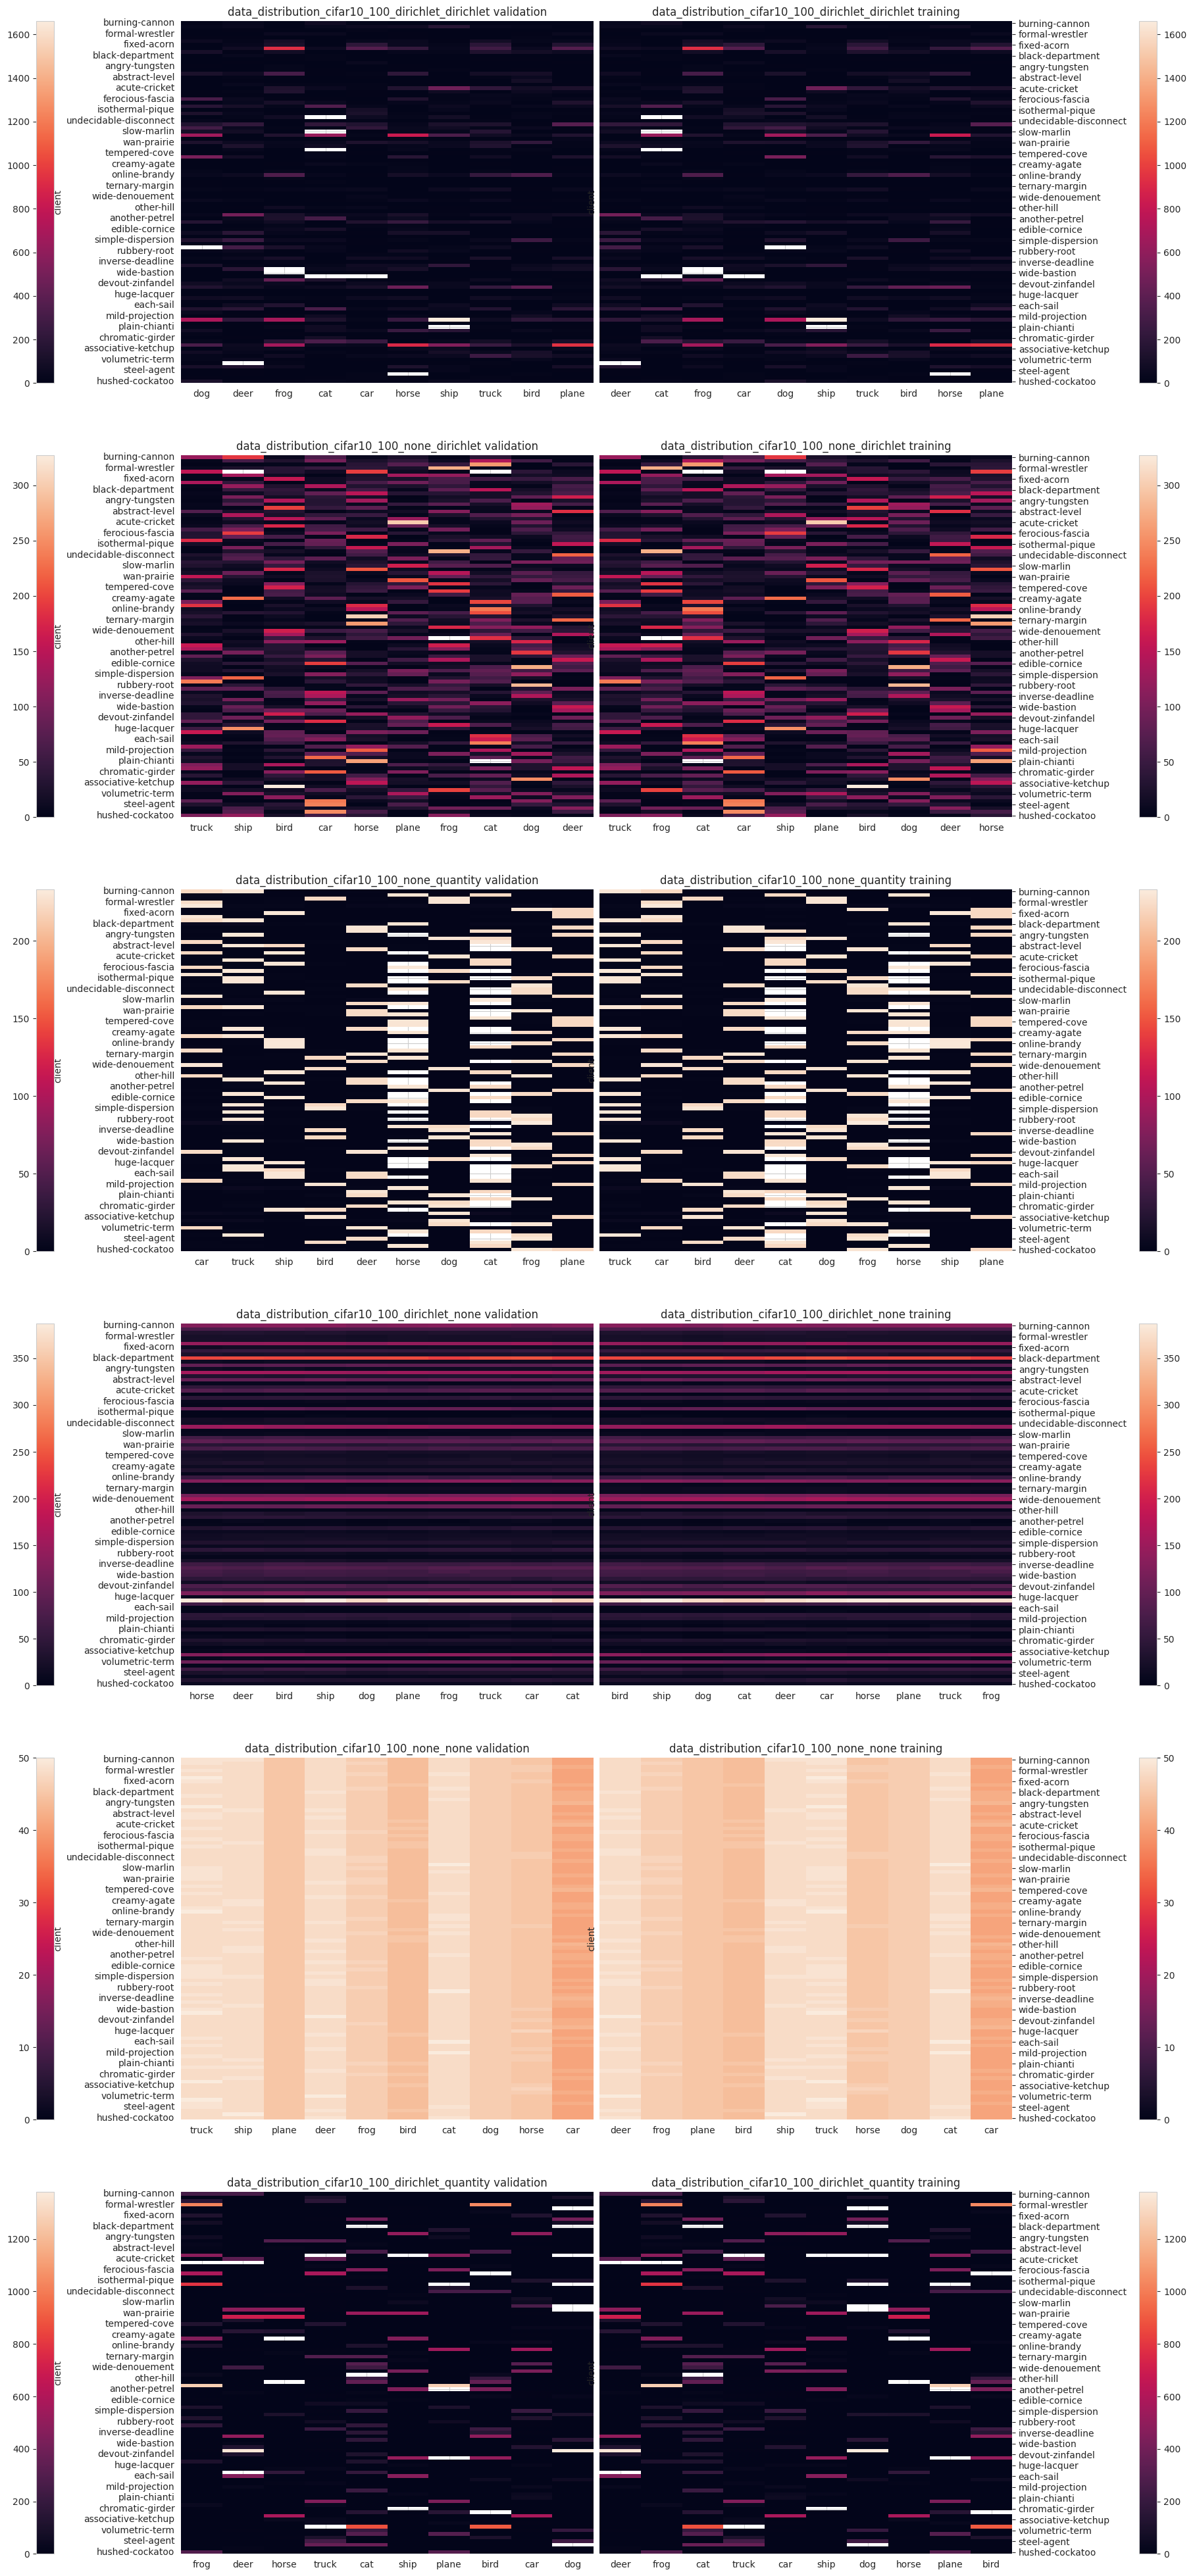

In [102]:
nrows = len(dfs_val.keys())
fig, axs = plt.subplots(ncols=2, nrows=nrows, figsize=(25, 50))
fig.subplots_adjust(wspace=0.01)
for i, key in enumerate(dfs_val.keys()):
    sns.heatmap(dfs_val[key], cmap="rocket", ax=axs[i][0], cbar=False, vmin=0)
    fig.colorbar(axs[i][0].collections[0], ax=axs[i][0],location="left", use_gridspec=False, pad=0.2)
    sns.heatmap(dfs_train[key], cmap="rocket", ax=axs[i][1], cbar=False, vmin=0)
    fig.colorbar(axs[i][1].collections[0], ax=axs[i][1],location="right", use_gridspec=False, pad=0.2)
    axs[i][1].yaxis.tick_right()
    axs[i][1].tick_params(rotation=0)
    axs[i][0].set_title(key + " validation")
    axs[i][1].set_title(key + " training")
plt.show()